In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df.shape

(768, 9)

In [45]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [47]:
display(X, y)

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]])

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
       147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
       111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
        88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
        99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
       131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
       123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
        85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,
        78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105,
       173, 122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108,
       108, 154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,
        99, 109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110,
       111, 102, 134,  87,  79,  75, 179,  85, 129, 143, 130,  8

In [48]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [49]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

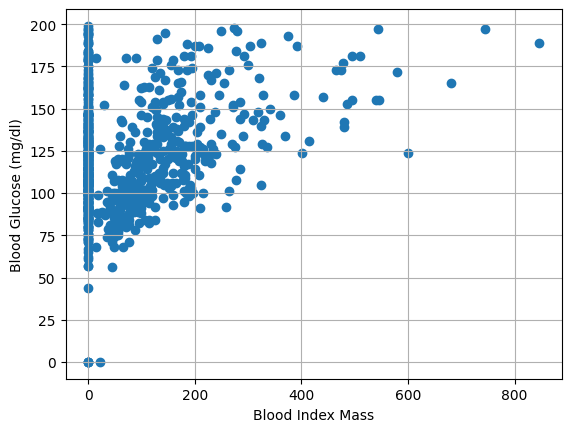

In [50]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Blood Index Mass")
plt.grid()
plt.show()

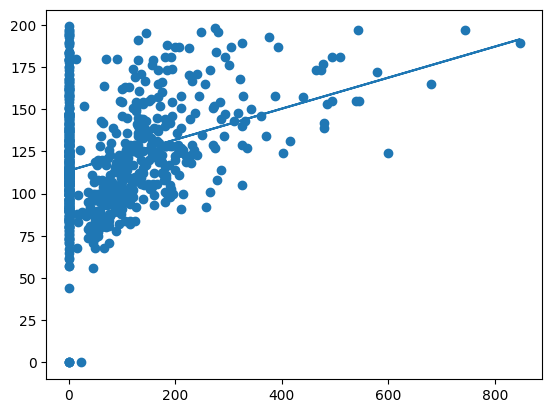

In [51]:
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.28280468810375115

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


np.float64(20.548453668839123)

In [55]:
diabetes_df.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


210
